In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 3s 1us/step


In [4]:
import numpy as np
def vectorize(seq, dim=10000):
    res = np.zeros((len(seq),dim))
    for i, s in enumerate(seq):
        res[i,s] = 1.
    return res
x = vectorize(train_data)
xTest = vectorize(test_data)

from keras.utils.np_utils import to_categorical
y = to_categorical(train_labels)
yTest = to_categorical(test_labels)

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [6]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [7]:
xv = x[:1000]
yv = y[:1000]
xt = x[1000:]
yt = y[1000:]

In [8]:
hist = model.fit(xt,yt, epochs = 20, batch_size = 510, validation_data=(xv,yv))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 178us/step - loss: 2.5247 - acc: 0.4954 - val_loss: 1.7099 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.4390 - acc: 0.6903 - val_loss: 1.3425 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.0907 - acc: 0.7647 - val_loss: 1.1638 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.8658 - acc: 0.8168 - val_loss: 1.0633 - val_acc: 0.7650
Epoch 5/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.7001 - acc: 0.8490 - val_loss: 0.9831 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5640 - acc: 0.8801 - val_loss: 0.9463 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.4577 - acc: 0.9053 - val_loss: 0.9128 - val_acc: 0.8010


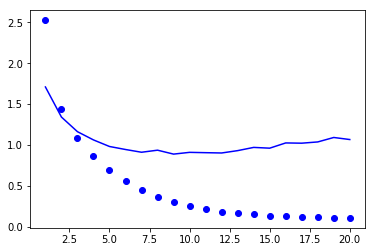

In [9]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
vloss = hist.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss,'bo',label = 'Train loss')
plt.plot(epochs, vloss, 'b',label = 'Val loss')
plt.show()